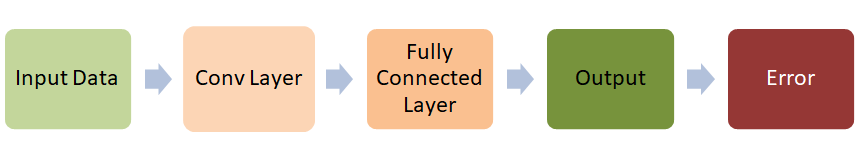

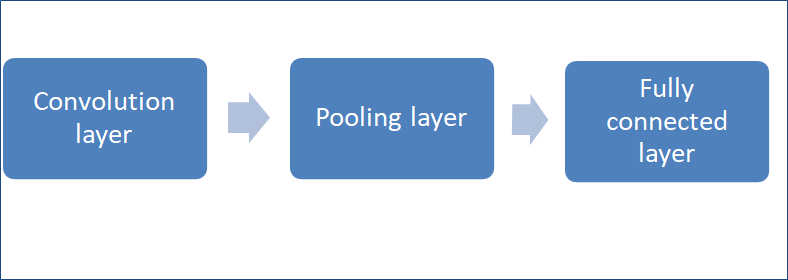

## Layers in CNN

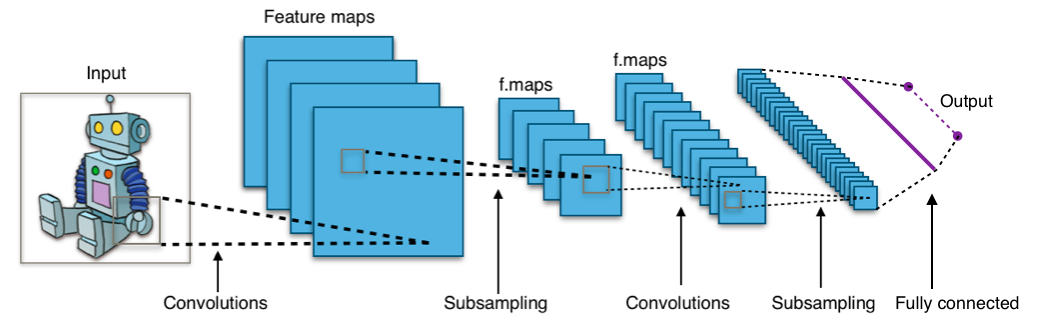



### Convolution Layer

1. The Convolution layer or the Conv layer is the core building block of a CNN that does most of the computational heavy lifting. 
2. The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. 
3. Each computation leads to extraction of a feature map from the input image. 
4. In other words, imagine if there is an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. 
5. At each position of that matrix, we multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 
6. As a result, we get a single number that represents all the values in that window of the images. 
7. Use this layer for filtering: 
    as the window moves over the image, we check for patterns in that section of the image. 
    This works because of filters, which are multiplied by the values outputted by the convolution.



## The Fashion-MNIST Data Set

[Fashion-MNIST](https://arxiv.org/abs/1708.07747) is a Novel Image Dataset for Benchmarking Machine Learning Algorithms. It consists of 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

There are 10 classes in this dataset:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot
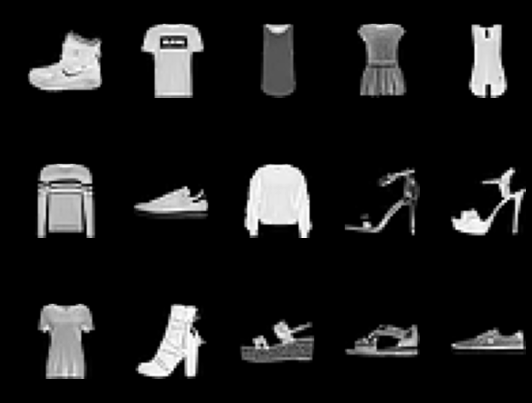

You can find the Fashion-MNIST dataset [here](https://github.com/zalandoresearch/fashion-mnist), but you can also load it with the help of specific TensorFlow and Keras modules.

### Loading the data

Keras comes with a library called datasets, which you can use to load datasets. You download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Now you're completely set to start analyzing, processing and modeling your data!

### Analyzing the data

Let's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [2]:
import numpy as np

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

Now, let's find the number of classes in the dataset.

In [3]:
# print (len(train_Y))

assert len(train_Y)==60000, 'the length should be 60000'

In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


So, there are a total of ten output classes that range from 0 to 9.

Now, take a look at the images in the dataset:

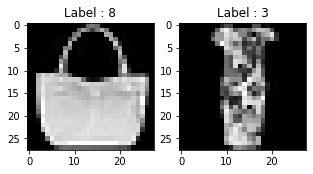

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[5,5])

# Display some image in training data
plt.subplot(121) # one rows, two columns, refer to first entry
plt.imshow(train_X[100,:,:], cmap='gray');
plt.title("Label : {}".format(train_Y[100]));

# Display some image in testing data
plt.subplot(122) # one rows, two columns, refer to second entry
plt.imshow(test_X[100,:,:], cmap='gray');
plt.title("Label : {}".format(test_Y[100]));

The output of above two plots looks like a ???, and this class is assigned a class label of ???. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 boot images will have a class label of 9.

### Data Preprocessing

As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28 (2D image). But the **layers in CNN accepts the image as 3D**. As a result, you'll need to preprocess the data before you feed it into the model.

#### As a first step, convert each 28 x 28 2D image of the train and test set into a 3D matrix of size 28 x 28 x 1 which is fed into the network i.e. we are converting the 2D images into 3D images.

In [6]:
train_X.shape

(60000, 28, 28)

In [7]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

### Convert the class labels into a one-hot encoding vector.

* In one-hot encoding, you convert the categorical data into a vector of numbers. 
* The reason for converting the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. 
* A boolean column is generated for each category or class. 
* Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For this dataset, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. 

* The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. 
* For example, the ankle boot image that you plotted above has a label of 9, so for all the boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 0 1].

So let's convert the training and testing labels into one-hot encoding vectors:

In [9]:
from tensorflow.keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y, num_classes = 10)
test_Y_one_hot = to_categorical(test_Y, num_classes = 10)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[100])
print('After conversion to one-hot:', train_Y_one_hot[100])

Original label: 8
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


- This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. 
    For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. 
       In this case, we will train the model on 80% of the training data and validate it on 20% of the remaining training data. 
       This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Constructing the CNN

#### Using 3 convolution layers:

- The first layer will have 32-3 x 3 filters
- The second layer will have 64-3 x 3 filters
- The third layer will have 128-3 x 3 filters

In addition, there are three max-pooling layers each of size 2 x 2.
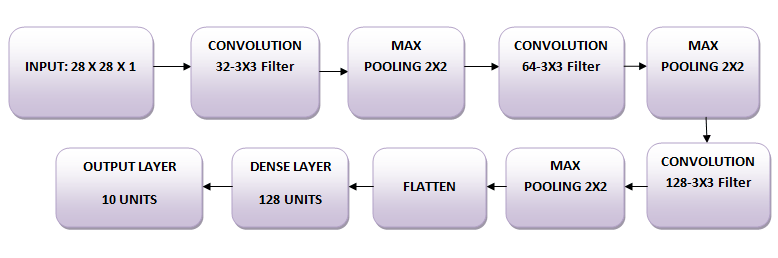

Now, let's import all the necessary modules to construct the network.

#### The initial layers have fewer number of filters and as we proceed further, we keep on increasing the number of filters. This will help in extracting the prominant features in the beginning and as we move further the increased number of filters help in extracting the finer features.

### A CNN recognizes edges in earlier layers and more complex forms in later layers. 

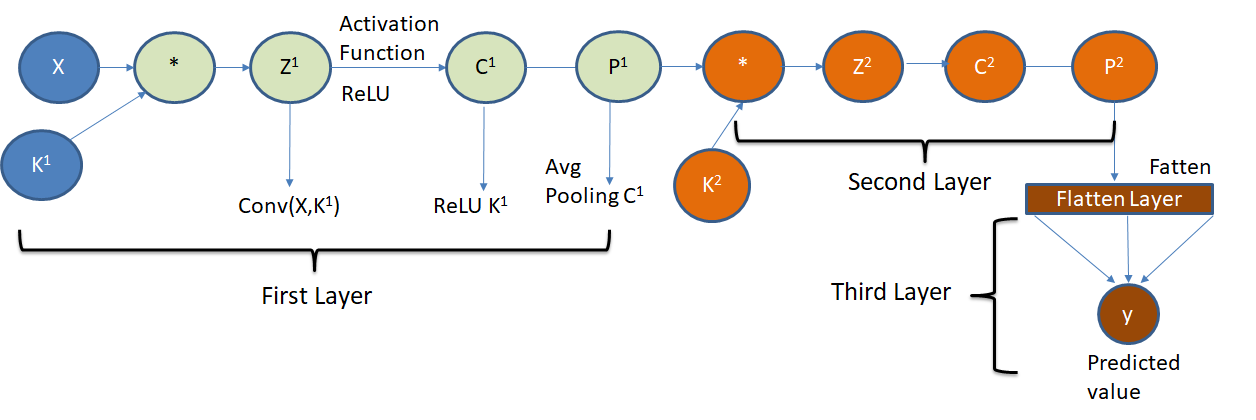

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

We will use a batch size of 64 and we will train the network for 2 epochs.

In [12]:
batch_size = 64
epochs = 2
num_classes = 10

In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here:   
- Add a first convolutional layer with Conv2D(). When using this layer as the first layer in a model, provide the keyword argument **input_shape** (3D matrix). 
- Note that you use this function because you're working with images! 
- Next, add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. 
- Since there are ten different classes, we need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

- Add the max-pooling layer with MaxPooling2D() and so on. 
- The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

1. Here, we have not specified **Stride** while adding Convolution layer and MaxPooling layer.
2. For Convolution layer, the default stride is **(1,1)**.
3. For MaxPooling layer, the default stride is equal to **pool_size** i.e. **(2,2)** in this case.

Using 3 convolution layers:

    The first layer will have 32-3 x 3 filters
    The second layer will have 64-3 x 3 filters
    The third layer will have 128-3 x 3 filters

In addition, there are three max-pooling layers each of size 2 x 2. 

In [13]:
fashion_model = Sequential()
#############################################################
fashion_model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1),padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='valid')) ### subsampling

###################################################################
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))

######################################################################
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#################################################################
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
#fashion_model.add(Dense(256, activation='linear'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

2024-04-10 06:23:28.212526: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

## Compiling the model

* After the model is created, compile it using the **Adam optimizer**, one of the most popular optimization algorithms. 
* Additionally, specify the loss type which is **categorical cross entropy** used for multi-class classification, 
* **binary cross-entropy** can also be used as the loss function. 
* Lastly, specify the metrics as accuracy which you want to analyze while the model is training.

In [15]:
fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])


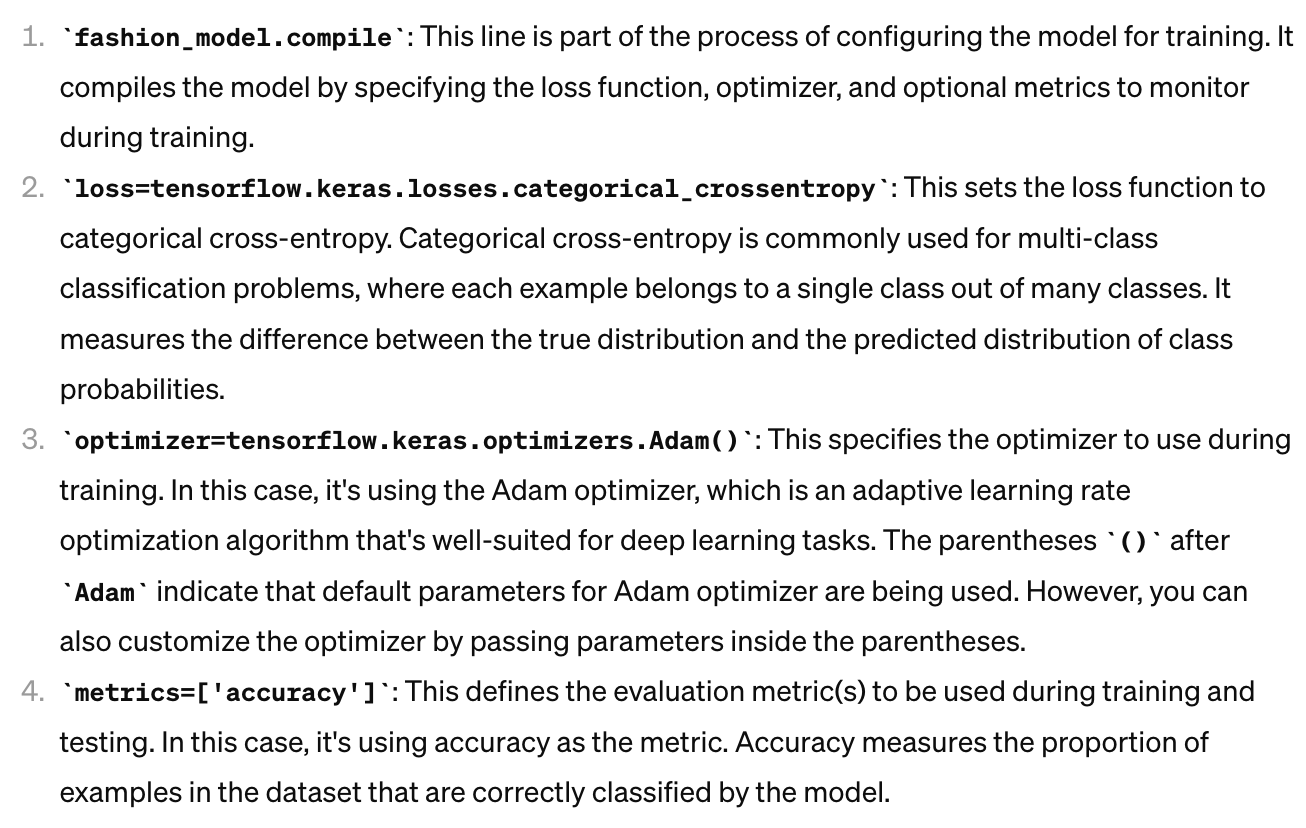

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

## ADD VISUALIZATION HERE

## Training the model

It's finally time to train the model with fit() function! The model trains for 5 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [16]:
print (train_X.shape[0]//batch_size)

750


In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

2024-04-10 06:23:39.075093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/2
750/750 [==============================] - 34s 44ms/step - loss: 0.6205 - accuracy: 0.7748 - val_loss: 0.3306 - val_accuracy: 0.8831
Epoch 2/2
750/750 [==============================] - 32s 43ms/step - loss: 0.2972 - accuracy: 0.8935 - val_loss: 0.3051 - val_accuracy: 0.8922


Finally! You trained the model on fashion-MNIST for 5 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 5 epochs the training accuracy is almost ??? and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is ??? and the validation accuracy is ???. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

## Model evaluation on test set

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3243 - accuracy: 0.8831
Test loss: 0.32425254583358765
Test accuracy: 0.8830999732017517


The test accuracy looks impressive. However, you saw that the model looked like it was overfitting. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

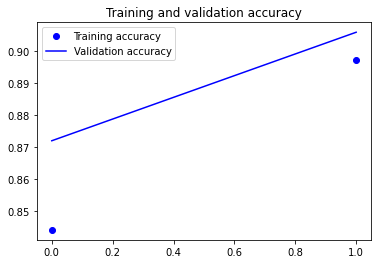

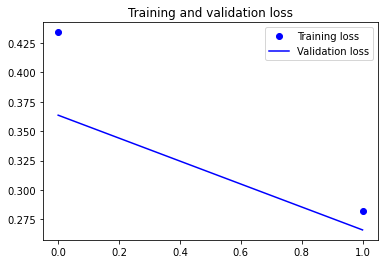

In [44]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
range(len(accuracy))

range(0, 5)

#### From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

#### The validation loss shows that this is the sign of `overfitting`, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

### Handling overfitting through dropout

    You can add a dropout layer to overcome the problem of overfitting to some extent. 
    Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. 
    How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. 
    This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

    So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [29]:
batch_size = 64
epochs = 10
num_classes = 10

fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
##########################################################################
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
########################################################################
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#################################################
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
##################################################
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)         

### Compiling and fitting the model

In [30]:
fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/10
750/750 [==============================] - 31s 41ms/step - loss: 0.8508 - accuracy: 0.6828 - val_loss: 0.3679 - val_accuracy: 0.8664
Epoch 2/10
750/750 [==============================] - 32s 43ms/step - loss: 0.3956 - accuracy: 0.8542 - val_loss: 0.3182 - val_accuracy: 0.8850
Epoch 3/10
750/750 [==============================] - 34s 46ms/step - loss: 0.3365 - accuracy: 0.8774 - val_loss: 0.2841 - val_accuracy: 0.8984
Epoch 4/10
750/750 [==============================] - 40s 53ms/step - loss: 0.3057 - accuracy: 0.8864 - val_loss: 0.2656 - val_accuracy: 0.9014
Epoch 5/10
750/750 [==============================] - 37s 49ms/step - loss: 0.2809 - accuracy: 0.8954 - val_loss: 0.2559 - val_accuracy: 0.9035
Epoch 6/10
750/750 [==============================] - 37s 49ms/step - loss: 0.2687 - accuracy: 0.9008 - val_loss: 0.2461 - val_accuracy: 0.9081
Epoch 7/10
750/750 [==============================] - 37s 50ms/step - loss: 0.2570 - accuracy: 0.9044 - val_loss: 0.2501 - val_accuracy:

## Saving the model

* Save the model so that you can directly load it and not have to train it again for 20 epochs. 
* This way, you can load the model later on if you need it and modify the architecture; 
* Alternatively, you can start the training process on this saved model. 
* It is always a good idea to save the model -and even the model's weights!- because it saves you time. 
**Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [19]:
fashion_model.save("fashion_model_dropout.h5py");

2024-04-10 11:40:21.689924: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


## Model evaluation on test set

Now, let's also evaluate your new model and see how it performs!

In [32]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23638854920864105
Test accuracy: 0.9138000011444092


Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

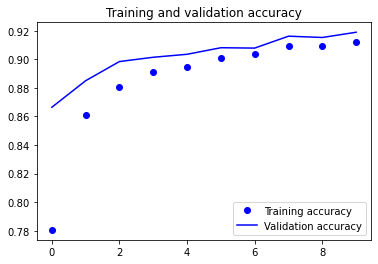

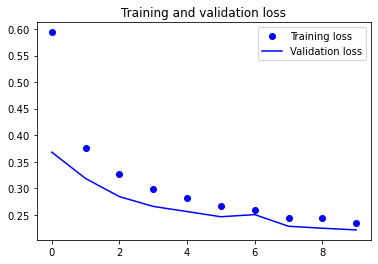

In [33]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Prediction by the trained model

In [34]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes.shape

(10000, 10)

In [36]:
predicted_classes[1]

array([2.4094181e-06, 8.5115915e-14, 9.9999094e-01, 4.4016124e-10,
       5.4158736e-06, 7.0009902e-14, 1.1451871e-06, 5.8765807e-16,
       2.1686082e-13, 4.1928436e-14], dtype=float32)

In [37]:
print (predicted_classes[10])
print (np.argmax(predicted_classes[10]))

[1.17918462e-05 8.11380971e-07 4.02781880e-03 2.52810342e-08
 9.82832611e-01 8.31288727e-09 1.31268855e-02 5.11624146e-11
 3.14897122e-08 5.01646635e-09]
4


Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [38]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9097 correct labels


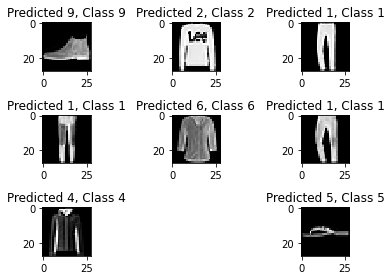

In [41]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 903 incorrect labels


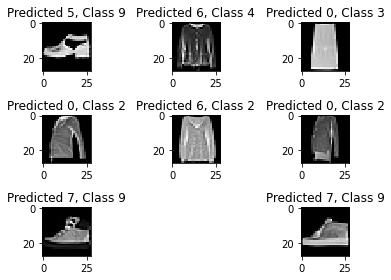

In [42]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture.

## Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [39]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.90      0.83      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.88      0.84      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.68      0.74      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0, the classifier is lacking precision and recall is not above 90%. Also, for class 2, the classifier is slightly lacking recall.

#### What is verbose

* What is the use of verbose?
    ** By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
    ** verbose=0 will show you nothing (silent)
    ** verbose=1 will show you an animated progress bar like this:
    progres_bar


    
    verbose=2 will just mention the number of epoch like this:

